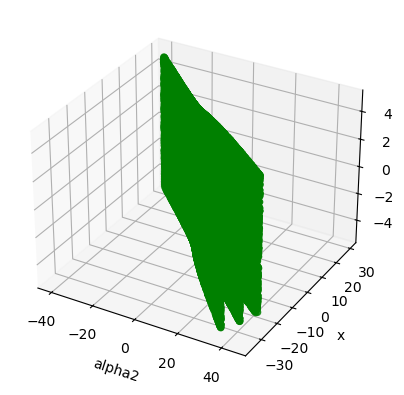

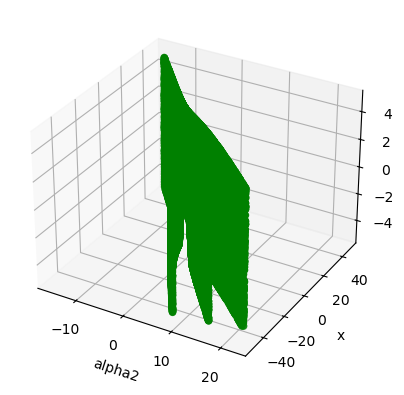

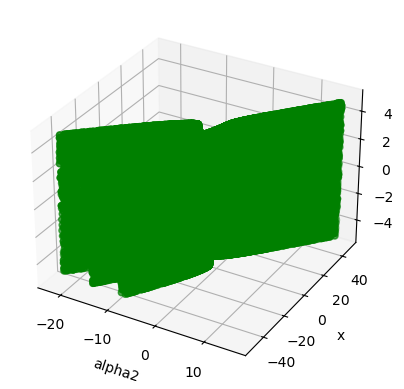

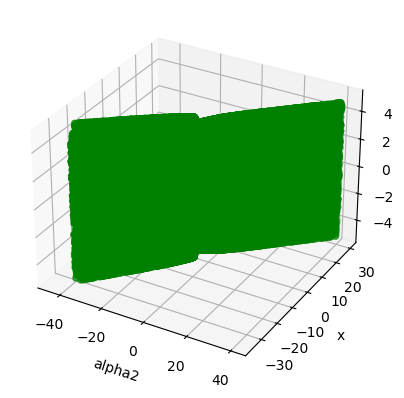

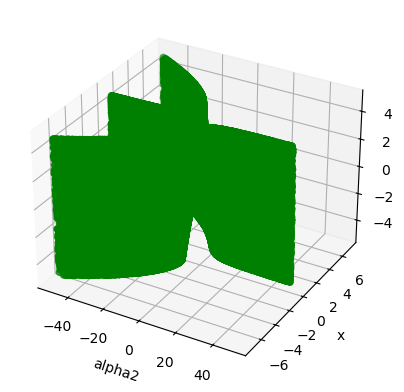

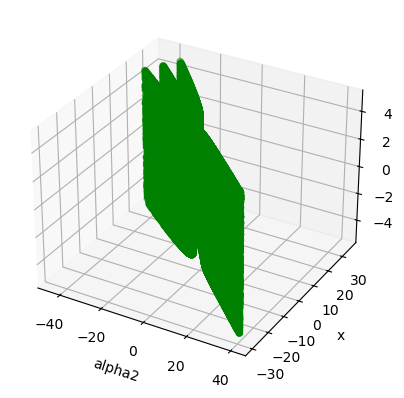

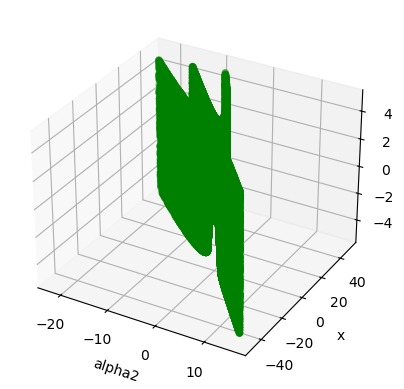

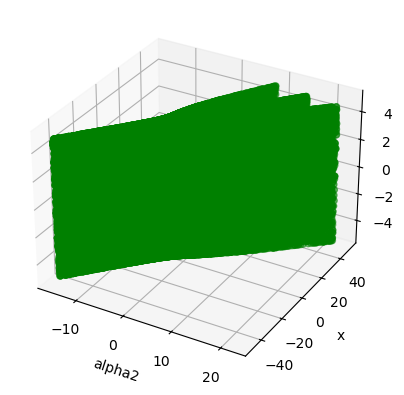

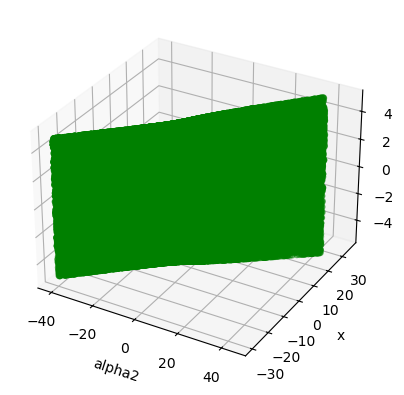

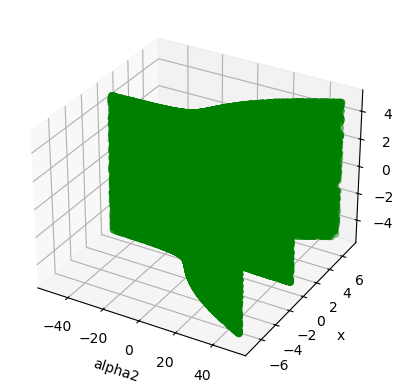

In [1]:
from utils import *
%load_ext autoreload
%autoreload 2
def nprangediv(div):
    return np.arange(-div, div) / div


def f(alpha1, alpha2, x):
    return alpha1 + alpha2 * x - x * x * x


def iteratein(a, dim):
    atemp = np.swapaxes(a, 0, dim)
    return (atemp[x][0] for x in range(a.shape[dim]))

c = 10000000
n = 50
a = np.zeros((0,3))

rands = np.random.Generator(np.random.get_bit_generator()).uniform(-50, 50, (c, 2))
for alpha1, i in ((((x / n)-0.5)*10,x) for x in range(n)):
    v = rands[np.where(np.abs(f(alpha1, rands[:, 0], rands[:, 1])) <= 0.1)]
    v = np.concatenate([v,np.full((v.shape[0],1),alpha1)],1)
    a = np.concatenate([a,v],0)
    

import scipy

for d in range(10):
    fig = plt.figure()
    ax = plt.axes(projection="3d")
    r = scipy.spatial.transform.Rotation.from_euler('z', 36, degrees=True)
    a =  a @ r.as_matrix()
    ax.scatter3D(a[:,0], a[:,1], a[:,2], color="green")
    ax.set_xlabel('alpha2')
    ax.set_ylabel('x')
    ax.set_zlabel('alpha1')
    plt.show()